<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/50/Logo_fh_hof.svg/2000px-Logo_fh_hof.svg.png" width="250" style="background-color:#FFF">

---

<p style="font-size:44px;"><i><u>Q-Learning mit 'Super Mario Bros'</u></i></p>
<br>
<p style="font-size:16px;">Seminararbeit der Vorlesung <b>Angewandtes Maschinelles Lernen</b> an der <b>Hochschule für angewande Wissenschaften Hof</b> des <b>Sommersemesters 2020</b>.</p>

---

<h1>Inhaltsverzeichnis<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Vorbereitungen" data-toc-modified-id="Vorbereitungen-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Vorbereitungen</a></span></li><li><span><a href="#Bibliotheken" data-toc-modified-id="Bibliotheken-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Bibliotheken</a></span><ul class="toc-item"><li><span><a href="#OpenAI-Gym" data-toc-modified-id="OpenAI-Gym-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>OpenAI Gym</a></span></li><li><span><a href="#Torch" data-toc-modified-id="Torch-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Torch</a></span></li><li><span><a href="#Tensorboard" data-toc-modified-id="Tensorboard-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Tensorboard</a></span></li></ul></li><li><span><a href="#Klassen" data-toc-modified-id="Klassen-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Klassen</a></span><ul class="toc-item"><li><span><a href="#Super-Mario-Bros---Enviorment" data-toc-modified-id="Super-Mario-Bros---Enviorment-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Super Mario Bros - Enviorment</a></span></li><li><span><a href="#Memory" data-toc-modified-id="Memory-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Memory</a></span></li><li><span><a href="#Agent" data-toc-modified-id="Agent-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Agent</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Model</a></span></li></ul></li><li><span><a href="#Test-Run" data-toc-modified-id="Test-Run-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Test-Run</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Trainingsergebnis" data-toc-modified-id="Trainingsergebnis-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Trainingsergebnis</a></span></li><li><span><a href="#Google-Colab" data-toc-modified-id="Google-Colab-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Google-Colab</a></span></li><li><span><a href="#Referenzen" data-toc-modified-id="Referenzen-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Referenzen</a></span></li></ul></div>

---

## Vorbereitungen

Zu aller erst müssen ein paar Vorbereitungen getroffen werden ...

In [1]:
%run 'CLASS/Vorbereitungen.ipynb'

JupyterNotebook-Html-Container auf 80% Relative-Weite gestezt ...
Requierments-Management gestartet ...
Requierments-Management abgeschlossen ...
Ordner-Management gestartet ...
LOGS-Ordner ...
... bereits vorhanden ...
... entleeren übersprungen ...
REC-Ordner ...
... bereits vorhanden ...
... entleert ...
MODEL-Ordner ...
... bereits vorhanden ...
... entleeren übersprungen ...
Ordner-Management abgeschlossen ...
CUDA-Gpu entdeckt ...
Initialisiere Hilfsfunktionen ...
... "show_video" erzeugt ...
... "plot_rrs" erzeugt ...
... "plot_avg_rrss" erzeugt ...
... abgeschlossen ...
Vorbereitungen erfolgreich abgeschlossen ...


Jetzt noch ein paar '*unwichtige*' Import-Statements ...

In [2]:
from IPython.utils.io import capture_output

---

## Bibliotheken

Jetzt werden die wesentlichen Bibliotheken importiert (evtl. konfiguriert) und kurz erklärt.

<br>
<h3 style=" clear: both;display: table;">OpenAI Gym</h3>

<div style="box-sizing: border-box;width:450px;margin-left: auto;margin-right: auto">
  
<div style="float: left; width: 175px;padding: 5px;height: 175px">
<img src="https://i.gzn.jp/img/2017/05/26/openai-baselines-dqn/00.png" width="175" />
</div>
  
<div style="float: left; width: 75px;padding: 5px;padding-top:30px;margin-left:30px;margin-left:30px">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/86/A_perfect_SVG_heart.svg/1200px-A_perfect_SVG_heart.svg.png" width="100" />
</div>
  
<div style="float: left; width: 125px;padding: 5px;height: 175px;">
<img src="https://warehouse-camo.ingress.cmh1.psfhosted.org/198f06f6c66355bf8b78cae634e8155028948538/68747470733a2f2f757365722d696d616765732e67697468756275736572636f6e74656e742e636f6d2f323138343436392f34303934393631332d37353432373333612d363833342d313165382d383935622d6365316363336166396462622e676966" width="175" />
</div>
</div>


OpenAI-Gym ist ein Toolkit für das Entwickeln und Vergleichen von Reinforcement-Learning-Algorithmen.

[Weitere Informationen](https://pypi.org/project/gym/)

In [3]:
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor

In [4]:
gymlogger.set_level(50) # 50: disabled, 40: error, 30: warning, 20: info, 10: debug

Jetzt noch das <b>'Super Mario Bros'-Gym</b>.

[Weitere Informationen](https://pypi.org/project/gym-super-mario-bros/)

In [5]:
import gym_super_mario_bros

from nes_py.wrappers import JoypadSpace
from gym_super_mario_bros.actions import RIGHT_ONLY, SIMPLE_MOVEMENT, COMPLEX_MOVEMENT

<br>

### Torch

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/Pytorch_logo.png/800px-Pytorch_logo.png" width="300">

Ein Open-Source-Framework für maschinelles Lernen ähnlich wie Tensorflow.

[Weitere Informationen](https://pypi.org/project/torch/1.5.0/)

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [7]:
def get_torch_device():
    """Gibt die Device-ID zurück die für Torch verwendet wird."""
    return torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### Tensorboard

In [8]:
%%capture
from torch.utils.tensorboard import SummaryWriter

In [9]:
from datetime import datetime

global _swriter
global _LOGS_BASE_DIR
global _ABSOLUTE_TRAINED_EPISODE

_ABSOLUTE_TRAINED_EPISODE = 0

_swriter = SummaryWriter("{}/DQN_{}".format(_LOGS_BASE_DIR, datetime.now().strftime("%d-%m-%Y_%H-%M-%S")))
_swriter_topic_reward_stats = 'Reward Statistiken'
#_swriter_reward_reward      = '{}/Reward'.format(_swriter_topic_reward_stats)
_swriter_reward_sumreward   = '{}/Summe-Reward'.format(_swriter_topic_reward_stats)
_swriter_reward_avgreward   = '{}/Durchschnitt-Reward'.format(_swriter_topic_reward_stats)
_swriter_topic_mario_positions = 'Mario\'s Positionen'
_swriter_mario_xpos            = '{}/X-Pos'.format(_swriter_topic_mario_positions)
_swriter_mario_ypos            = '{}/Y-Post'.format(_swriter_topic_mario_positions)
_swriter_topic_mario_stats = 'Mario\'s Statistiken'
_swriter_mario_status      = '{}/Status'.format(_swriter_topic_mario_stats)
_swriter_mario_life        = '{}/Life'.format(_swriter_topic_mario_stats)
_swriter_mario_flag        = '{}/Flag'.format(_swriter_topic_mario_stats)
_swriter_topic_gym_stats = 'Gym\'s Statistiken'
_swriter_gym_time        = '{}/Total Time'.format(_swriter_topic_gym_stats)
_swriter_gym_coins       = '{}/Coin'.format(_swriter_topic_gym_stats)
_swriter_gym_score       = '{}/Score'.format(_swriter_topic_gym_stats)

def write_rrs_to_tensorboard(rrs):
    global _ABSOLUTE_TRAINED_EPISODE
    global _swriter
    
    _ABSOLUTE_TRAINED_EPISODE += 1
    
    #_swriter.add_scalar(_swriter_reward_reward, rrs.reward, _ABSOLUTE_TRAINED_EPISODE)
    _swriter.add_scalar(_swriter_reward_sumreward, rrs.sum_reward, _ABSOLUTE_TRAINED_EPISODE)
    _swriter.add_scalar(_swriter_reward_avgreward, rrs.avg_reward, _ABSOLUTE_TRAINED_EPISODE)
    
    _swriter.add_scalar(_swriter_mario_xpos, rrs.x_pos, _ABSOLUTE_TRAINED_EPISODE)
    _swriter.add_scalar(_swriter_mario_ypos, rrs.y_pos, _ABSOLUTE_TRAINED_EPISODE)
    
    _swriter.add_scalar(_swriter_mario_status, rrs.status, _ABSOLUTE_TRAINED_EPISODE)
    _swriter.add_scalar(_swriter_mario_life, rrs.life, _ABSOLUTE_TRAINED_EPISODE)
    _swriter.add_scalar(_swriter_mario_flag, rrs.flag_get, _ABSOLUTE_TRAINED_EPISODE)
    
    _swriter.add_scalar(_swriter_gym_time, rrs.total_time, _ABSOLUTE_TRAINED_EPISODE)
    _swriter.add_scalar(_swriter_gym_coins, rrs.coins, _ABSOLUTE_TRAINED_EPISODE)
    _swriter.add_scalar(_swriter_gym_score, rrs.score, _ABSOLUTE_TRAINED_EPISODE)

print("Open a terminal and launch Tensorboard manualy by typing:\n\ntensorboard --logdir {}".format(_LOGS_BASE_DIR))

Open a terminal and launch Tensorboard manualy by typing:

tensorboard --logdir ./LOGS


---

## Klassen

Jetzt werden noch die ausgelagerten Klassen geladen. Sie werden dabei kurz vorgestellt - für genauere Informationen empfiehlt es sich in die jeweiligen JupyterNotebooks zugucken.

### Super Mario Bros - Enviorment

<table><thead><tr><th>SuperMarioBros-v0</th><th>SuperMarioBros-v1</th><th>SuperMarioBros-v2</th><th>SuperMarioBros-v3</th><th>SuperMarioBros2-v0</th><th>SuperMarioBros2-v1</th></tr></thead><tbody><tr><td><img src="https://warehouse-camo.ingress.cmh1.psfhosted.org/c4717c633d3823dda390ebc21bac34b18e7c22c3/68747470733a2f2f757365722d696d616765732e67697468756275736572636f6e74656e742e636f6d2f323138343436392f34303934383832302d33643135653563322d363833302d313165382d383164342d6563666166666565306131342e706e67" width="175"></td><td><img src="https://warehouse-camo.ingress.cmh1.psfhosted.org/e8eda56caeefcada9af67f43385ef1f48d0ac394/68747470733a2f2f757365722d696d616765732e67697468756275736572636f6e74656e742e636f6d2f323138343436392f34303934383831392d33636666366334382d363833302d313165382d383337332d3866616431363635616337322e706e67" width="175"></td><td><img src="https://warehouse-camo.ingress.cmh1.psfhosted.org/7f53e40eb716be49673cf41fb833486ab3ee104a/68747470733a2f2f757365722d696d616765732e67697468756275736572636f6e74656e742e636f6d2f323138343436392f34303934383831382d33636561303964342d363833302d313165382d386566612d3866333464386230356231312e706e67" width="175"></td><td><img src="https://warehouse-camo.ingress.cmh1.psfhosted.org/51975e7cc634efb02ed92acfb56368733b25f4d9/68747470733a2f2f757365722d696d616765732e67697468756275736572636f6e74656e742e636f6d2f323138343436392f34303934383831372d33636436363030612d363833302d313165382d386162622d3963656536613331643337372e706e67" width="175"></td><td><img src="https://warehouse-camo.ingress.cmh1.psfhosted.org/0618011a5c6cedb9dba051b8cf134ba51dd0777a/68747470733a2f2f757365722d696d616765732e67697468756275736572636f6e74656e742e636f6d2f323138343436392f34303934383832322d33643362383431322d363833302d313165382d383630622d6166333830326635333733662e706e67" width="175"></td><td><img src="https://warehouse-camo.ingress.cmh1.psfhosted.org/7c42437f4d2f447e192c088eab22739534c2d9be/68747470733a2f2f757365722d696d616765732e67697468756275736572636f6e74656e742e636f6d2f323138343436392f34303934383832312d33643264363161322d363833302d313165382d383738392d6139326537353061613961382e706e67" width="175"></td></tr></tbody></table>

In [10]:
%run 'CLASS/SuperMarioBrosEnviorment.ipynb'

global _GYM_ENV_ID
global _GYM_ACTIONS
global _MONITOR_RECORD_EVERY

_GYM_ENV_ID = "SuperMarioBros-v1"

# __Benchmark für 1000 Steps in dem Testlauf ohne Training o.ä.__
# V0 -- 0:00:03.020264 -- 0:00:03.009269 --
# V1 -- 0:00:03.018293 --
# V2 -- 0:00:03.008501 --
# V3 -- 0:00:03.036722 --

SuperMarioBrosEnviorment-Parameter auf Default-Werte gestetz ...


### Memory

In [11]:
%run 'CLASS/Memory.ipynb'

Memory-Device-Parameter initialisiert ...


### Agent

In [12]:
%run 'CLASS/Agent.ipynb'

AGENT-Parameter initialisiert ...
... BUFFER_SIZE: 5000 ...
... BATCH_SIZE: 256 ...
... GAMMA: 0.99 ...
... TAU: 0.001 ...
... LR: 0.0005 ...
... UPDATE_EVERY: 10 ...


### Model

In [13]:
%run 'CLASS/Model.ipynb'

---

## Test-Run

Jetzt sind wir bereit für einen Run ! Hier wird <b>nur</b> demonstriert wie das Gym funktioniert. 

Folgendes soll passieren:

- Es soll eine kurze Sequenz gespielt werden
- Der Run soll als Video gespeichert werden
- Die Aktionen sollen zufällig gewählt werden (hier werden sie reduziert um Mario bestmöglichst zu steuern)
- Im Anschluss sollen das Video als auch Statistiken zu dem Run angezeigt werden

In [14]:
max_frames = 500
testrun_frames = np.zeros( (max_frames, 240, 256, 3), dtype=np.uint8)

def make_test_run(env):
    """"""
    global max_frames
    
    # Reduziere mögliche Aktion auf für diesen Test-Run sinnvolle Aktionen
    valid_actions = get_reduced_actionset()
    available_actions = len(valid_actions)
    
    # Gebe die alle reduzierten Aktionen und ihre genau Bedeutung aus
    actions_meaning = env._env.get_action_meanings()
    filtered_actions_meaning = []
    for i in valid_actions: filtered_actions_meaning.append(actions_meaning[i])
    print('Mögliche Aktionen: {}'.format(filtered_actions_meaning)) 
        
    # Beginne von neu
    env.reset()

    print('Beginne Testlauf ...')
    timestart = datetime.now() # Zeitmessen vor dem Testdurchlauf
    
    # Wiederhole bis zu max_frames
    for step in range(max_frames):
        # Render Mario
        testrun_frames[step] = env.render(mode = 'rgb_array')
        # Wähle eine Aktion aus und mache den Schritt im Env
        observation, reward, done, info = env.step( valid_actions[np.random.randint(available_actions) ])
        # Stoppe wenn das Enviorment ferig ist
        if done or env._reward_records[-1].flag_get:
            break
    
    timeend = datetime.now()
    print('... Testlauf abgeschlossen in {} ...'.format(timeend - timestart))

Los gehts!

Initialisieren SuperMarioBrosEnviorment mit Parameter ...
... ID: SuperMarioBros-v1
... ACTIONS: [['NOOP'], ['right'], ['right', 'A'], ['right', 'B'], ['right', 'A', 'B'], ['A'], ['left']]
... RECORD_EVERY: 1 ...
... abgeschlossen ...
Wrappe Enviormenter in Monitor ...
... Video-Output-Pfad: "./REC/run_03-05-2020_00-16-20__16ef0da1-55c6-4600-8fae-bca8f47472b0" ...
Mögliche Aktionen: ['right', 'right A', 'A']
Beginne Testlauf ...


/home/jan/anaconda3/lib/python3.7/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


... Testlauf abgeschlossen in 0:00:01.507171 ...


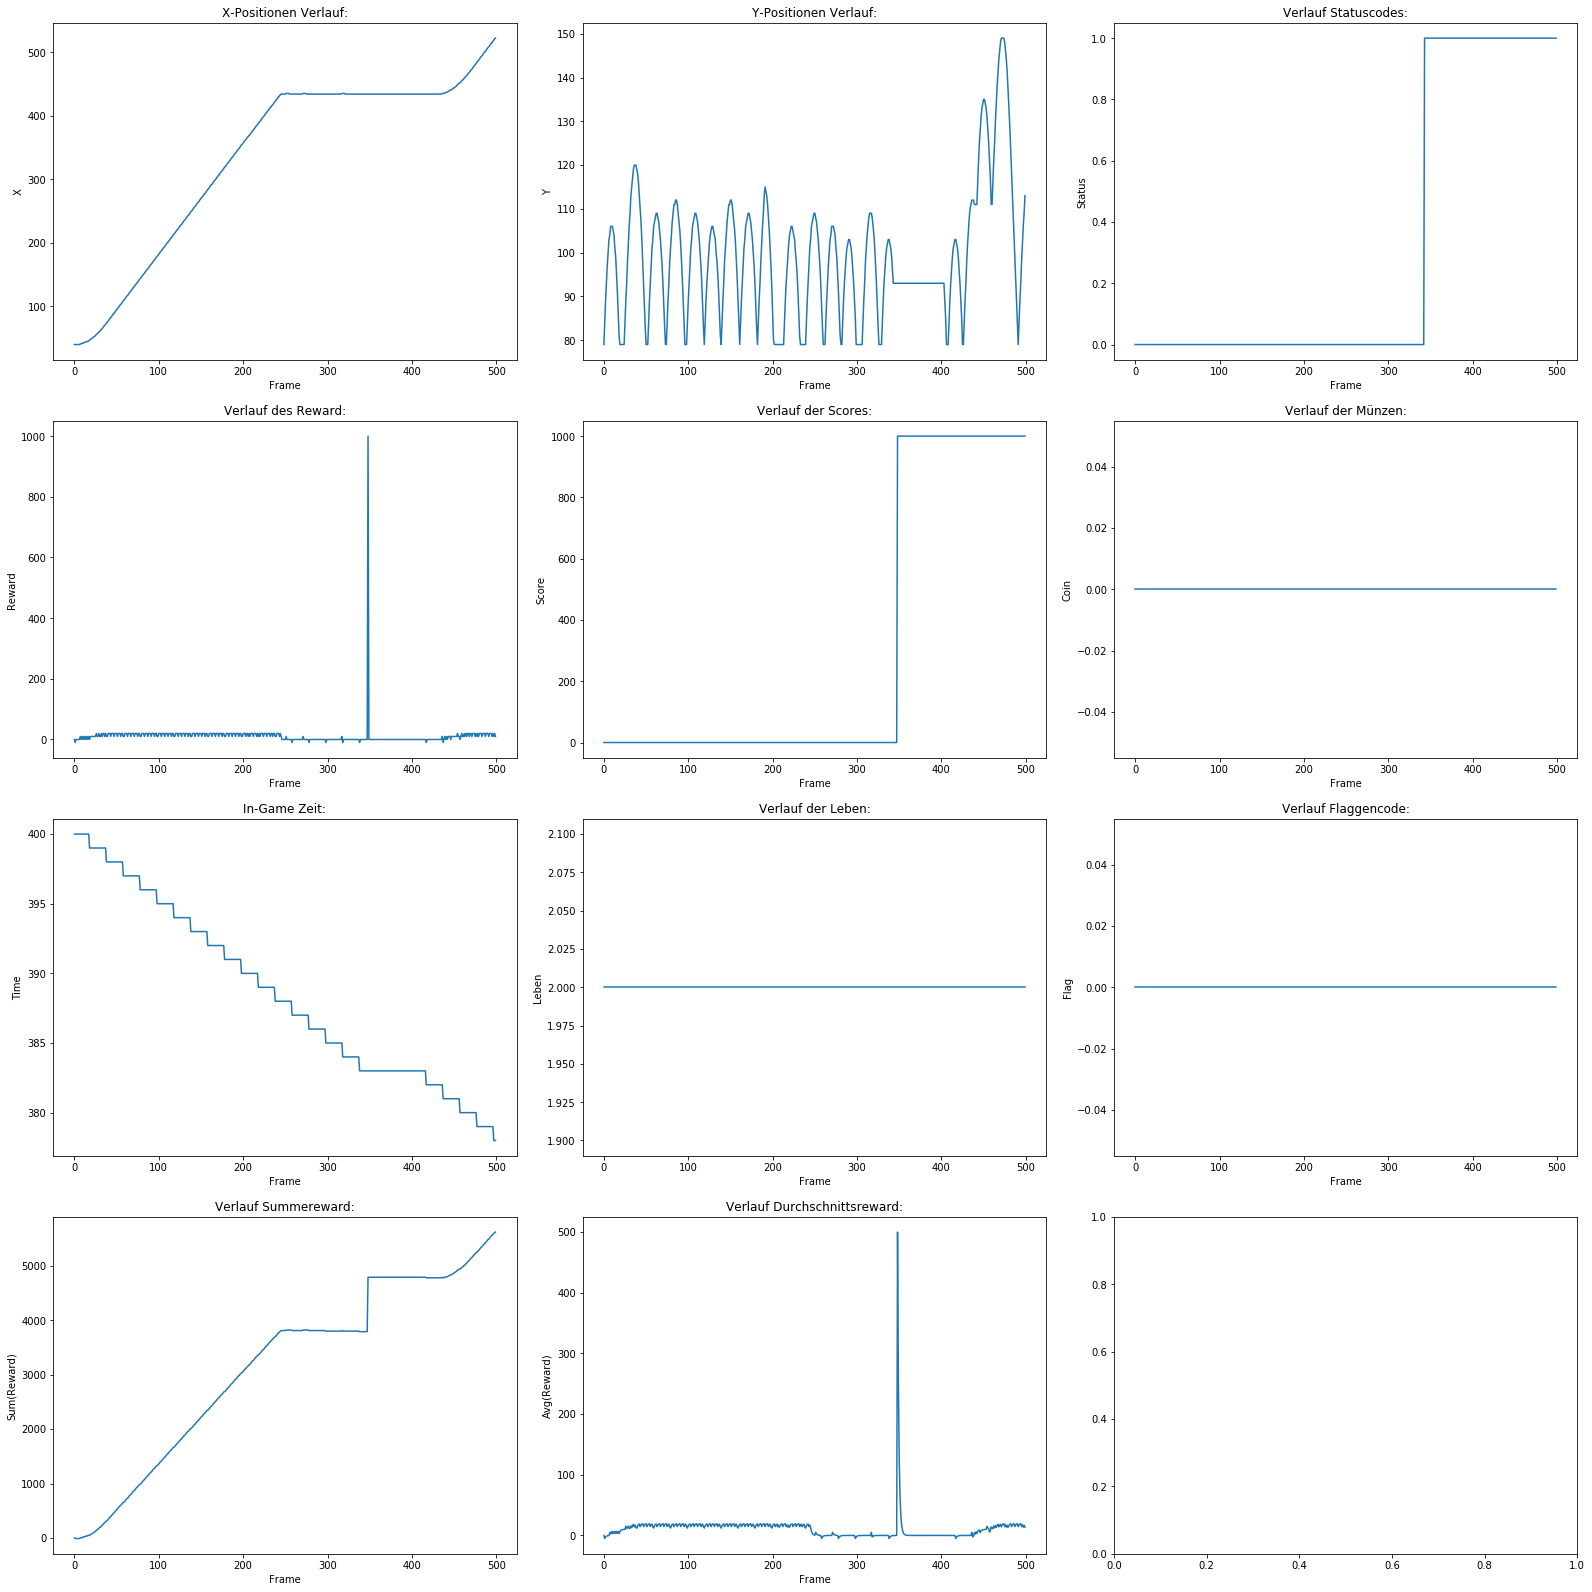

In [15]:
env = SuperMarioBrosEnviorment() # Erzeuge das Enviorment 
videopath = env.monitor() # Nehmm das Gym auf
results = make_test_run(env) # Mach ein Testdurchlauf
env.close() # Beende das Enviorment
show_video(videopath) # Zeige das aufgenomme Video an
plot_rrs(env._reward_records) # Zeige die Reward-Record Statistiken

## Preprocessing

Für eine bessere Performance wird jedes Frame noch vereinfacht das sieht dann so aus...

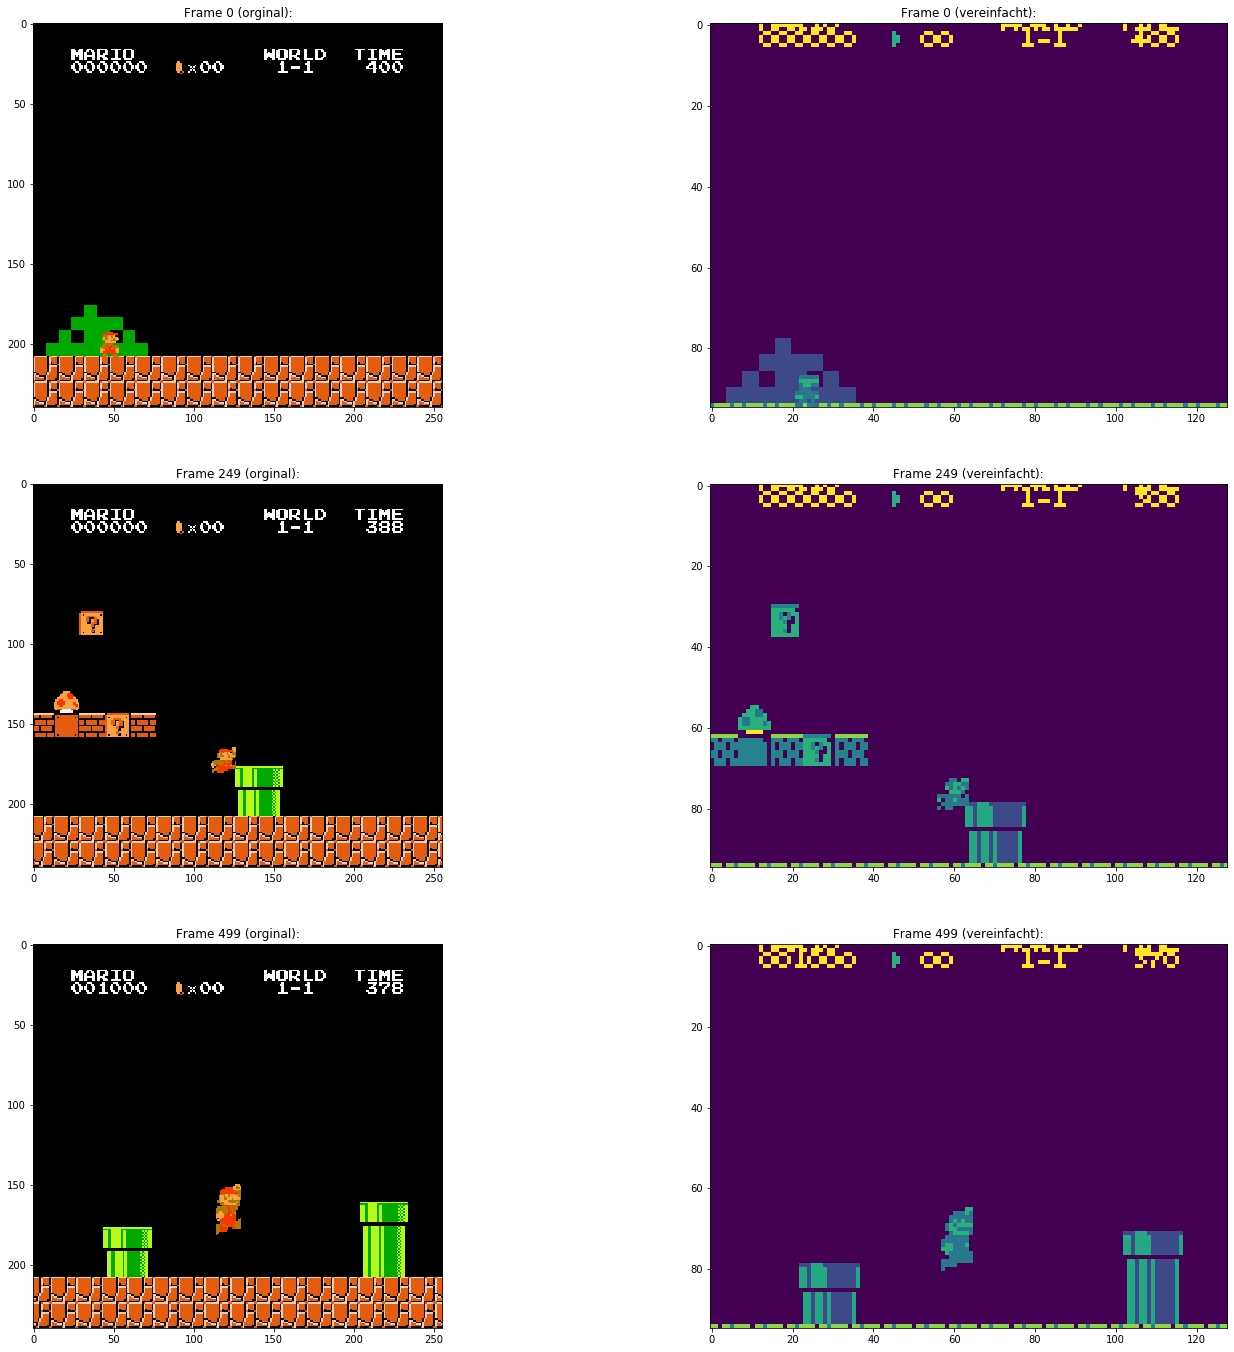

In [16]:
def simplify_frame(frame):
    frame = frame.sum(axis = -1) / 765 # farbtiefe reduzieren
    frame = frame[20:210,:] # oben und unten abschneiden
    frame = frame[::2,::2] # gesamtgröße halbieren
    return frame

# Zu Anzeige der Frames wird Plot genutzt
fig, ax = plt.subplots(3,2, figsize=(24, 24))
ax[0,0].set_title("Frame 0 (orginal):")
ax[0,0].imshow(testrun_frames[0])
ax[0,1].set_title("Frame 0 (vereinfacht):")
ax[0,1].imshow(simplify_frame(testrun_frames[0]))

ax[1,0].set_title("Frame {} (orginal):".format(int(max_frames/2) - 1))
ax[1,0].imshow(testrun_frames[int(max_frames/2) - 1 ])
ax[1,1].set_title("Frame {} (vereinfacht):".format(int(max_frames/2) - 1))
ax[1,1].imshow(simplify_frame(testrun_frames[int(max_frames/2) - 1]))
                  
ax[2,0].set_title("Frame {} (orginal):".format((max_frames - 1)))
ax[2,0].imshow(testrun_frames[max_frames - 1])
ax[2,1].set_title("Frame {} (vereinfacht):".format((max_frames - 1)))
ax[2,1].imshow(simplify_frame(testrun_frames[max_frames - 1]))

## Training

Jetzt wird trainiert!

In [17]:
episode = 50
discount_rate = .99
noise = 0.05
noise_decay = 0.99
tmax = 50000

env = SuperMarioBrosEnviorment()
rewards = []

# keep track of frames
FRAME_SHAPE = (95, 128)
MAX_FRAMES = 4
nn_frames = deque(maxlen = MAX_FRAMES)

for i in range(MAX_FRAMES):
    nn_frames.append(np.zeros(FRAME_SHAPE))
    
action_size = len(_GYM_ACTIONS)
state_size = (MAX_FRAMES,) + FRAME_SHAPE

agent = DQNAgent(QNetworkDuellingCNN, state_size, action_size, ddqn = True, priority = True)

global _ABSOLUTE_TRAINED_EPISODE
global _LOST_LIFE_PENALITY

_last_absolute_e = _ABSOLUTE_TRAINED_EPISODE

print("Agent ist bereits {} Episoden trainiert worden ...\nBeginne Training ...".format(_ABSOLUTE_TRAINED_EPISODE))
_training_start = datetime.now()

for e in range(episode):
    obs = env.reset()
    prev_obs = None
    
    for i in range(MAX_FRAMES):
        nn_frames.append(np.zeros(FRAME_SHAPE))
        
    nn_frames.append(np.copy(simplify_frame(obs)))
    states = np.array(nn_frames)
    
    for t in range(tmax):
#         prev_obs = np.copy(obs)
        actions = agent.act(states, noise)
        obs, reward, done, _ = env.step(actions)
        nn_frames.append(np.copy(simplify_frame(obs)))
        next_states = np.array(nn_frames)
#         next_states = model_preprocess(obs, prev_obs)
        
        agent.step(states, int(actions), int(reward), next_states, int(done))
        states = next_states
        
        if done or env._reward_records[-1].total_time >= 200:
            break
    
    agent.update_error()
    
    # get the average reward of the parallel environments
    noise = noise * noise_decay
    
    rewards.append(env._reward_records)
    
    write_rrs_to_tensorboard(env._reward_records[-1])
    
    print('\rEp: {:>4}/{:<4} | t.R: {:>11.1f} | a.R: {:>8.3f} | X: {:>6} | t.T: {:>3}'.format(
        e+1+_last_absolute_e, episode+_last_absolute_e, env._reward_records[-1].sum_reward, env._reward_records[-1].avg_reward, env._reward_records[-1].x_pos, env._reward_records[-1].total_time
    ), end = "")
    
_training_end = datetime.now()
print('\nTraining abgeschlossen in {} ...'.format(_training_end - _training_start))

env.close()
plot_avg_rrss(rewards)

Initialisieren SuperMarioBrosEnviorment mit Parameter ...
... ID: SuperMarioBros-v1
... ACTIONS: [['NOOP'], ['right'], ['right', 'A'], ['right', 'B'], ['right', 'A', 'B'], ['A'], ['left']]
... RECORD_EVERY: 1 ...
... abgeschlossen ...


Exception ignored in: <function Monitor.__del__ at 0x7f1c8b6ae0e0>
Traceback (most recent call last):
  File "/home/jan/anaconda3/lib/python3.7/site-packages/gym/wrappers/monitor.py", line 229, in __del__
    self.close()
  File "/home/jan/anaconda3/lib/python3.7/site-packages/gym/wrappers/monitor.py", line 134, in close
    super(Monitor, self).close()
  File "/home/jan/anaconda3/lib/python3.7/site-packages/gym/core.py", line 238, in close
    return self.env.close()
  File "/home/jan/anaconda3/lib/python3.7/site-packages/gym/core.py", line 238, in close
    return self.env.close()
  File "/home/jan/anaconda3/lib/python3.7/site-packages/gym/core.py", line 238, in close
    return self.env.close()
  File "/home/jan/anaconda3/lib/python3.7/site-packages/nes_py/nes_env.py", line 338, in close
    raise ValueError('env has already been closed.')
ValueError: env has already been closed.


Agent ist bereits 0 Episoden trainiert worden ...
Beginne Training ...


/home/jan/anaconda3/lib/python3.7/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


Ep:   20/50   | t.R:     22440.0 | a.R:   -5.000 | X:    594 | t.T: 200

KeyboardInterrupt: 

In [ ]:
#plot_rrs(rewards[42])

#global _MODEL_BASE_DIR
#torch.save(model.state_dict(), _MODEL_BASE_DIR)

#model = TheModelClass(*args, **kwargs)
#model.load_state_dict(torch.load(PATH))
#model.eval()

## Trainingsergebnis

In [ ]:
repeats = 3
for n in range(repeats):
    # Prep
    env = SuperMarioBrosEnviorment()
    videopath = env.monitor()
    
    # Var
    obs = env.reset()
    prev_obs = None
    frames = np.zeros((tmax, 240, 256, 3), dtype = np.uint8)
    for i in range(MAX_FRAMES):
        nn_frames.append(np.zeros(FRAME_SHAPE))
    nn_frames.append(np.copy(simplify_frame(obs)))

    states = np.array(nn_frames)

    for t in range(tmax):
        frames[t] = obs
        actions = agent.act(states, noise)
        obs, reward, done, info = env.step(actions)
        nn_frames.append(np.copy(simplify_frame(obs)))
        next_states = np.array(nn_frames)

        states = next_states
        if done:
            break

    env.close()
    show_video(videopath)
    plot_rrs(env._reward_records, "Run {} ({})".format(n+1, videopath)) 

Initialisieren SuperMarioBrosEnviorment mit Parameter ...
... ID: SuperMarioBros-v1
... ACTIONS: [['NOOP'], ['right'], ['right', 'A'], ['right', 'B'], ['right', 'A', 'B'], ['A'], ['left']]
... RECORD_EVERY: 1 ...
... abgeschlossen ...
Wrappe Enviormenter in Monitor ...
... Video-Output-Pfad: "./REC/run_03-05-2020_00-23-46__636461d0-f249-4888-bc90-533e7b67fe47" ...


/home/jan/anaconda3/lib/python3.7/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


Initialisieren SuperMarioBrosEnviorment mit Parameter ...
... ID: SuperMarioBros-v1
... ACTIONS: [['NOOP'], ['right'], ['right', 'A'], ['right', 'B'], ['right', 'A', 'B'], ['A'], ['left']]
... RECORD_EVERY: 1 ...
... abgeschlossen ...
Wrappe Enviormenter in Monitor ...
... Video-Output-Pfad: "./REC/run_03-05-2020_00-25-40__4593700b-2c8a-4b01-b370-dfb1bc2ed58a" ...


Exception ignored in: <function Monitor.__del__ at 0x7f1c8b6ae0e0>
Traceback (most recent call last):
  File "/home/jan/anaconda3/lib/python3.7/site-packages/gym/wrappers/monitor.py", line 229, in __del__
    self.close()
  File "/home/jan/anaconda3/lib/python3.7/site-packages/gym/wrappers/monitor.py", line 134, in close
    super(Monitor, self).close()
  File "/home/jan/anaconda3/lib/python3.7/site-packages/gym/core.py", line 238, in close
    return self.env.close()
  File "/home/jan/anaconda3/lib/python3.7/site-packages/gym/core.py", line 238, in close
    return self.env.close()
  File "/home/jan/anaconda3/lib/python3.7/site-packages/gym/core.py", line 238, in close
    return self.env.close()
  File "/home/jan/anaconda3/lib/python3.7/site-packages/nes_py/nes_env.py", line 338, in close
    raise ValueError('env has already been closed.')
ValueError: env has already been closed.
/home/jan/anaconda3/lib/python3.7/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: ove

## Google-Colab

Übrigens funktioniert dieses Skript auch mit <b>Google-Colab</b>, dazu müssen allerdings folgende wenige Schritte unternommen werden:

1. Dieses Jupyter-Notebook in Colab importieren

2. Colab auf Laufzeitumgebung mit GPU stellen

3. In dem importieren Jupyter-Notebook einen Codeblock mit folgenden Befehlen am Anfang einfügen:

```
!git clone "https://github.com/JanGaida/research_project_machine_learning_hshof_sose2020"
!mv research_project_machine_learning_hshof_sose2020/* .
!rm -r research_project_machine_learning_hshof_sose2020
!pip install gym-super-mario-bros
```

## Referenzen

- [Super Mario Bros for OpenAi Gym, 2018, Christian Kauten](https://github.com/Kautenja/gym-super-mario-bros)

- [Using Reinforcement Learning to play Super Mario Bros on NES using TensorFlow, 2019, Sebastian Heinz](https://www.statworx.com/de/blog/using-reinforcement-learning-to-play-super-mario-bros-on-nes-using-tensorflow/)

- [Mario Reinforcement Learning (Double DQN), 2019, Sachin Abeywardana](https://github.com/sachinruk/Mario)